In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import time
start_notebook = time.time()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import norm

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import train_test_split

In [4]:
well_name = "LLB-10"

In [5]:
data = pd.read_csv(f"/content/drive/MyDrive/riset-fttm-gdrive/cuml-tf-model-hydrocarbon-prediction/data/interpreted/interpreted_{well_name}.csv", sep=',')


In [6]:
df=data[['CALI','DRHO','GR','MR','NPHI_corr','PEF','RHOB_CORR','ROP']]
df

,CALI,DRHO,GR,MR,NPHI_corr,PEF,RHOB_CORR,ROP
0,12.415,0.044,66.597,1.218,0.4272,3.013,2.318,274.659
1,12.560,0.018,66.809,1.210,0.4326,2.916,2.290,274.659
2,12.563,0.004,65.399,1.210,0.4481,2.845,2.265,274.659
3,13.139,0.012,64.328,1.236,0.4469,2.600,2.267,274.659
4,13.397,0.031,67.245,1.239,0.4317,2.478,2.276,319.478
...,...,...,...,...,...,...,...,...
796,12.810,0.149,71.371,1.929,0.4603,3.151,2.356,147.027
797,12.733,0.155,72.914,2.032,0.4665,3.256,2.350,147.027
798,13.073,0.163,70.924,2.097,0.4723,3.258,2.345,147.027
799,12.815,0.171,69.881,1.926,0.4702,3.237,2.353,147.027


In [7]:
#Struktur Data
print("Dimensi DataFrame:", data.shape)
print("Kolom DataFrame:", data.columns)
print("Tipe Data:", data.dtypes)

Dimensi DataFrame: (801, 38)
Kolom DataFrame: Index(['WELL', 'DEPT', 'CALI', 'DRHO', 'DT_MAA', 'GR', 'MR', 'SR', 'NPHI',
       'PEF', 'RHOB_CORR', 'ROP', 'DR', 'RHOB', 'VSH', 'RW',
       'hydrocarbon_formation_class', 'NPHI_corr', 'VCLGR', 'VCLRT', 'VCLND',
       'VCL', 'PHID', 'PHIDshc', 'PHI_SIMANDOUX', 'PHIN', 'PHINshc', 'PHIxND',
       'PHIE', 'CEC', 'T', 'SWarchie', 'SWsimandoux', 'SWindonesia',
       'SWwaxman', 'BVW', 'matrix', 'PERMtimur'],
      dtype='object')
Tipe Data: WELL                            object
DEPT                           float64
CALI                           float64
DRHO                           float64
DT_MAA                         float64
GR                             float64
MR                             float64
SR                             float64
NPHI                           float64
PEF                            float64
RHOB_CORR                      float64
ROP                            float64
DR                             float64
RH

In [8]:
# #Memeriksa Data yang Hilang
# print("\nData yang Hilang:\n", df.isnull().sum())

In [9]:
# #Statistik Deskriptif
# print("\nStatistik Deskriptif:\n", df.describe(include='all'))

In [10]:
# for column in df.select_dtypes(include=np.number).columns:
#     plt.figure(figsize=(8, 6))

#     # Plot histogram
#     sns.histplot(data[column], kde=False, bins=30, color='blue', alpha=0.6, label='Data Histogram')

#     # Tambahkan kurva normal
#     mean, std = data[column].mean(), data[column].std()
#     x = np.linspace(data[column].min(), data[column].max(), 1000)
#     y = norm.pdf(x, loc=mean, scale=std)
#     plt.plot(x, y * len(data[column]) * (data[column].max() - data[column].min()) / 30, color='red', label='Normal Curve')

#     # Label dan judul
#     plt.title(f'Distribusi {column}', fontsize=14)
#     plt.xlabel(column, fontsize=12)
#     plt.ylabel('Frekuensi', fontsize=12)
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [11]:
shapiro_results = df.apply(lambda col: shapiro(col)[1])  # [0] adalah p-value
shapiro_results

,0
CALI,1.627848e-13
DRHO,2.858668e-21
GR,8.736448e-08
MR,6.023484e-47
NPHI_corr,4.794962e-17
PEF,8.595929e-20
RHOB_CORR,8.988056e-18
ROP,1.196160e-05


In [12]:
# #Visualisasi Data


# boxplot_palette = sns.color_palette("Set2", len(df.columns))


# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df, palette=boxplot_palette)
# plt.title('Boxplot untuk Masing Masing Fitur')
# plt.show()


# fig, axes = plt.subplots(4, 2, figsize=(12, 18))
# axes = axes.flatten()

# for i, (column, color) in enumerate(zip(df.columns, boxplot_palette)):
#     axes[i].boxplot(df[column], patch_artist=True, boxprops=dict(facecolor=color))
#     axes[i].set_title(f'Boxplot {column}')

# plt.tight_layout()
# plt.show()

In [13]:
# #Korelasi
# correlation_matrix = df.corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Matriks Korelasi')
# plt.show()

# Data Preparation

## Splitting

In [14]:
# Misalkan 'data' adalah DataFrame Anda dan 'df' adalah fitur yang telah Anda ekstrak
X = df  # Fitur
y = data['hydrocarbon_formation_class']  # Label

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [ ]:
X_train.describe()

## Feature Transformation

### Histogram

In [15]:
def histogram_norm(dataframe,judul=''):
  for column in dataframe.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))

    # Plot histogram
    sns.histplot(dataframe[column], kde=False, bins=30, color='blue', alpha=0.6, label='Data Histogram')

    # Tambahkan kurva normal
    mean, std = dataframe[column].mean(), dataframe[column].std()
    x = np.linspace(dataframe[column].min(), dataframe[column].max(), 1000)
    y = norm.pdf(x, loc=mean, scale=std)
    plt.plot(x, y * len(dataframe[column]) * (dataframe[column].max() - dataframe[column].min()) / 30, color='red', label='Normal Curve')

    # Label dan judul
    plt.title(f'Distribusi {column} {judul}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
# histogram_norm(X_train,judul='')

### Box-Cox Transformation

In [18]:
# from scipy.special import boxcox1p

# tmp_X_bc=X_train.copy()

# lam = 0.3
# for column in tmp_X_bc.columns:
#   tmp_X_bc[column]=boxcox1p(tmp_X_bc[column],lam)

In [19]:
# histogram_norm(tmp_X_bc,judul='dengan Box-Cox')

In [20]:
# tmp_X_bc.apply(lambda col: shapiro(col)[1])

### Yeo-Johnson

In [21]:
# from sklearn.preprocessing import PowerTransformer

# tmp_X_yj = X_train.copy()

# yj_transformer = PowerTransformer(method='yeo-johnson',standardize=False)
# yeo_johnson_data = pd.DataFrame(yj_transformer.fit_transform(tmp_X_yj))
# yeo_johnson_data.columns = tmp_X_yj.columns.values
# yeo_johnson_data.index = tmp_X_yj.index.values
# df_tf_temp = yeo_johnson_data
# for i in df_tf_temp.columns:
#  tmp_X_yj[i]=df_tf_temp[i]

In [22]:
# histogram_norm(tmp_X_yj,judul='dengan Yeo-Johnson')

In [23]:
# tmp_X_yj.apply(lambda col: shapiro(col)[1])

### Quantile Transformation

In [24]:
from sklearn.preprocessing import QuantileTransformer

tmp_X_qt = X_train.copy()

qt_transformer = QuantileTransformer(output_distribution='normal')
qt_data = pd.DataFrame(qt_transformer.fit_transform(tmp_X_qt))
qt_data.columns = tmp_X_qt.columns.values
qt_data.index = tmp_X_qt.index.values
df_tf_temp = qt_data
for i in df_tf_temp.columns:
 tmp_X_qt[i]=df_tf_temp[i]

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (640). n_quantiles is set to n_samples.
  warnings.warn(


In [25]:
# histogram_norm(tmp_X_qt,judul='dengan Quantile Transformation')

In [26]:
tmp_X_qt.apply(lambda col: shapiro(col)[1])

,0
CALI,2.077371e-04
DRHO,2.684841e-04
GR,2.803542e-04
MR,2.750412e-04
NPHI_corr,2.791401e-04
PEF,2.786500e-04
RHOB_CORR,2.708868e-04
ROP,6.699471e-12


### Selection

In [27]:
# from scipy.stats import skew

# trans_result=pd.DataFrame({'Kolom':df.columns})
# tmp_bc=[]
# tmp_yj=[]
# tmp_qt=[]
# for i in df.columns:
#   tmp_bc.append(skew(tmp_X_bc[i]))
#   tmp_yj.append(skew(tmp_X_yj[i]))
#   tmp_qt.append(skew(tmp_X_qt[i]))

# trans_result['Skewness setelah transformasi Box Cox']=tmp_bc
# trans_result['Skewness setelah transformasi Yeo Johnson']=tmp_yj
# trans_result['Skewness setelah transformasi Quantile']=tmp_qt
# trans_result

In [28]:
# from scipy.stats import kurtosis

# trans_result_kurtosis=pd.DataFrame({'Kolom':df.columns})
# tmp_bc=[]
# tmp_yj=[]
# tmp_qt=[]
# for i in df.columns:
#   tmp_bc.append(kurtosis(tmp_X_bc[i]))
#   tmp_yj.append(kurtosis(tmp_X_yj[i]))
#   tmp_qt.append(kurtosis(tmp_X_qt[i]))

# trans_result_kurtosis['Kurtosis setelah transformasi Box Cox']=tmp_bc
# trans_result_kurtosis['Kurtosis setelah transformasi Yeo Johnson']=tmp_yj
# trans_result_kurtosis['Kurtosis setelah transformasi Quantile']=tmp_qt
# trans_result_kurtosis

In [29]:
X_train=tmp_X_qt

X_test2 = pd.DataFrame(qt_transformer.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [30]:
X_scaled2 = pd.DataFrame(qt_transformer.transform(X))
X_scaled2.columns = X.columns.values
X_scaled2.index = X.index.values
X_scaled = X_scaled2

In [31]:
X_train

,CALI,DRHO,GR,MR,NPHI_corr,PEF,RHOB_CORR,ROP
290,1.520738,2.240799,-0.033349,-0.209426,1.742751,0.605870,2.240799,-0.989581
706,0.369104,0.369104,-0.235563,1.228945,-0.417851,0.125859,-0.090346,-1.884718
154,-0.580147,-1.080038,0.171476,0.458877,-0.276098,-0.253752,-1.204278,1.716492
157,-0.725870,0.529809,0.207421,-0.388068,0.114006,-0.300634,-0.276098,-0.119930
265,-1.048931,0.219461,0.970558,0.179443,-0.383842,0.487395,-0.225492,-0.066736
...,...,...,...,...,...,...,...,...
458,-0.646436,0.000000,-0.851726,-0.478579,-1.336048,-0.398664,-0.610590,-0.350272
789,1.002465,1.317135,-0.688095,1.204278,0.615323,0.346104,0.573199,-0.703084
135,-2.733854,-2.046690,0.139710,0.897735,-0.135750,0.193413,-1.651720,0.388068
355,0.587124,0.263893,0.764710,0.589456,0.730984,0.237580,0.627218,0.191415


## Feature Scaling

karena menggunakan Quatile transformation dengan output gaussian, masing masing kolom secara otomatis ditransformasi ke distribusi normal baku, atau distribusi normal dengan rataan nol dan standar deviasi 1, oleh karena itu tidak diperlukan tambahan scaling.

In [32]:
X_train.describe()

,CALI,DRHO,GR,MR,NPHI_corr,PEF,RHOB_CORR,ROP
count,640.000000,640.000000,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000
mean,0.000013,-0.000350,-5.768701e-08,-0.000004,-0.000009,-0.000045,0.000032,0.007614
std,1.031936,1.032425,1.032295e+00,1.032267,1.032284,1.032270,1.032316,1.088146
min,-5.199338,-5.199338,-5.199338e+00,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.646436,-0.675721,-6.744913e-01,-0.678188,-0.675721,-0.678188,-0.670801,-0.674504
50%,-0.003923,0.000000,0.000000e+00,-0.005884,0.000000,0.000000,-0.001961,-0.000981
75%,0.658570,0.672663,6.744913e-01,0.674491,0.674491,0.674491,0.668347,0.670801
max,5.199338,5.199338,5.199338e+00,5.199338,5.199338,5.199338,5.199338,5.199338


# Classification

## Setup

In [33]:
Train_accuracy={}
Test_accuracy={}
CrossValidation_accuracy={}

In [34]:
# Import necessary CuML libraries for SVM and model evaluation

In [35]:
import time
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC as SklearnSVC

# Attempt to import cuML's SVC
try:
    from cuml.svm import SVC as cuMLSVC
    has_cuml = True
except ImportError:
    has_cuml = False

## SVM Model Training with Grid Search CV

We'll implement Support Vector Machine using CuML's GPU-accelerated implementation and optimize hyperparameters using Grid Search Cross-Validation.

In [36]:
# Parameter grid for both models
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# 1) scikit-learn SVM with GridSearchCV
sk_svc = SklearnSVC(kernel='rbf')
sk_grid = GridSearchCV(
    estimator=sk_svc,
    param_grid=param_grid,
    cv=5,
    verbose=3,
    n_jobs=-1
)

start_sk = time.time()
sk_grid.fit(X_train, y_train)
end_sk = time.time()
sk_duration = end_sk - start_sk
print(f"scikit-learn GridSearchCV training time: {sk_duration:.2f} seconds")
print("Best parameters (sklearn):", sk_grid.best_params_)

# Evaluate on the test set
sk_accuracy = sk_grid.score(X_test, y_test)
print(f"scikit-learn Test Accuracy: {sk_accuracy:.4f}")

# 2) cuML SVM with the same GridSearchCV
if has_cuml:
    cu_svc = cuMLSVC(kernel='rbf')
    cu_grid = GridSearchCV(
        estimator=cu_svc,
        param_grid=param_grid,
        cv=5,
        verbose=3,
        # Note: cuML estimator runs on GPU; this grid search runs on CPU orchestrating GPU calls
        n_jobs=1  # avoid multiprocessing issues with GPU
    )

    start_cu = time.time()
    cu_grid.fit(X_train, y_train)
    end_cu = time.time()
    cu_duration = end_cu - start_cu
    print(f"cuML GridSearchCV training time: {cu_duration:.2f} seconds")
    print("Best parameters (cuml):", cu_grid.best_params_)

    # Evaluate on the test set
    cu_accuracy = cu_grid.score(X_test, y_test)
    print(f"cuML Test Accuracy: {cu_accuracy:.4f}")
else:
    print("cuML is not installed or GPU not available. Please install RAPIDS cuML to run this benchmark.")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
scikit-learn GridSearchCV training time: 2.12 seconds
Best parameters (sklearn): {'C': 10, 'gamma': 'auto'}
scikit-learn Test Accuracy: 0.9379
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ................C=0.1, gamma=scale;, score=0.828 total time=   5.7s
[CV 2/5] END ................C=0.1, gamma=scale;, score=0.852 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=scale;, score=0.859 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=scale;, score=0.812 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=scale;, score=0.867 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=auto;, score=0.812 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=auto;, score=0.852 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=auto;, score=0.859 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=auto;, score=0.812 total time=   0.0s
[CV 5/5]

## Model Performance

Attempting to use cuML SVM model.

--- Evaluation Metrics for cuML SVM ---
Best Hyperparameters found by GridSearchCV: {'C': 10, 'gamma': 'auto'}
Best Cross-Validation Score (mean accuracy on training folds): 0.9563
Test Set Accuracy: 0.9379


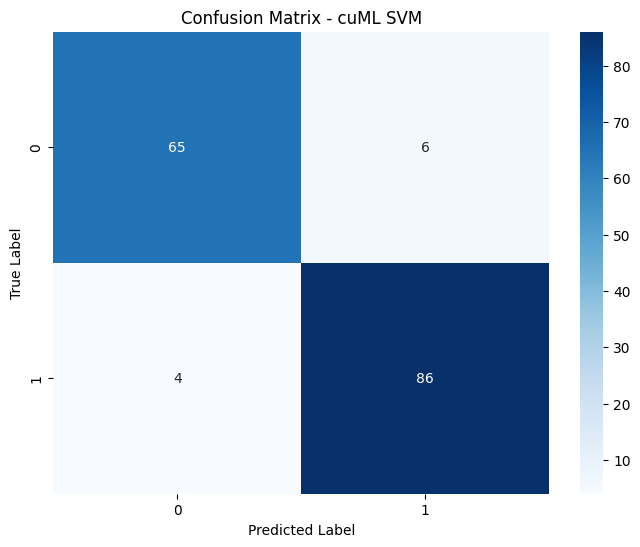


Classification Report - cuML SVM:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        71
           1       0.93      0.96      0.95        90

    accuracy                           0.94       161
   macro avg       0.94      0.94      0.94       161
weighted avg       0.94      0.94      0.94       161



In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Determine which grid object to use based on availability and successful fitting
# This assumes sk_grid is always available from the previous cell.
# cu_grid is used if has_cuml is True and cu_grid was successfully fitted.

grid_to_use = None
model_name = ""

if has_cuml and 'cu_grid' in globals() and hasattr(cu_grid, 'best_estimator_'):
    # Check if cuML model achieved a score (i.e., fitting was likely successful)
    # A more robust check might involve comparing cu_grid.best_score_ if available
    # For now, presence and best_estimator_ attribute suggest it was attempted.
    # We can also compare test accuracies if both were run.
    # Let's assume if cu_grid exists and has best_estimator_, we prefer it or it's the focus.
    # If you want to explicitly choose based on highest test accuracy from previous cell:
    # if sk_accuracy > cu_accuracy:
    #     grid_to_use = sk_grid
    #     model_name = "Scikit-learn SVM"
    # else:
    #     grid_to_use = cu_grid
    #     model_name = "cuML SVM"
    # For simplicity, let's prioritize cuML if its grid search object is available and seems valid.
    print("Attempting to use cuML SVM model.")
    grid_to_use = cu_grid
    model_name = "cuML SVM"
elif 'sk_grid' in globals() and hasattr(sk_grid, 'best_estimator_'):
    print("Using scikit-learn SVM model.")
    grid_to_use = sk_grid
    model_name = "Scikit-learn SVM"
else:
    print("Error: No valid fitted GridSearchCV object found (sk_grid or cu_grid). Please ensure the previous cell ran correctly.")
    # You might want to raise an error or exit if no model is available
    raise ValueError("No best model could be determined.")

best_model = grid_to_use.best_estimator_
best_cv_score = grid_to_use.best_score_ # This is the mean cross-validated score on the training data

# Ensure y_test is a NumPy array
if hasattr(y_test, 'to_numpy'):
    y_test_np = y_test.to_numpy()
else:
    y_test_np = np.asarray(y_test)

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Ensure y_pred is a NumPy array for scikit-learn metrics
if hasattr(y_pred, 'to_numpy'):  # Handles cuDF Series or Pandas Series
    y_pred_np = y_pred.to_numpy()
elif hasattr(y_pred, 'get'):  # Handles CuPy arrays
    y_pred_np = y_pred.get()
else:
    y_pred_np = np.asarray(y_pred) # Fallback, ensure it's a numpy array

# SVM Model Accuracy on the Test Set
# The .score() method is convenient as it handles prediction and scoring.
test_accuracy = best_model.score(X_test, y_test_np)
# Alternatively, using the predictions:
# from sklearn.metrics import accuracy_score
# test_accuracy = accuracy_score(y_test_np, y_pred_np)


print(f"\n--- Evaluation Metrics for {model_name} ---")
print(f"Best Hyperparameters found by GridSearchCV: {grid_to_use.best_params_}")
print(f"Best Cross-Validation Score (mean accuracy on training folds): {best_cv_score:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_np, y_pred_np)
class_labels = np.unique(y_test_np) # Get unique class labels from y_test

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
# Convert class_labels to string for target_names if they are not already strings
target_names_str = [str(label) for label in class_labels]
print(f"\nClassification Report - {model_name}:")
print(classification_report(y_test_np, y_pred_np, target_names=target_names_str, zero_division=0))


Ensure data.index represents actual depth values and is sorted for correct plotting.


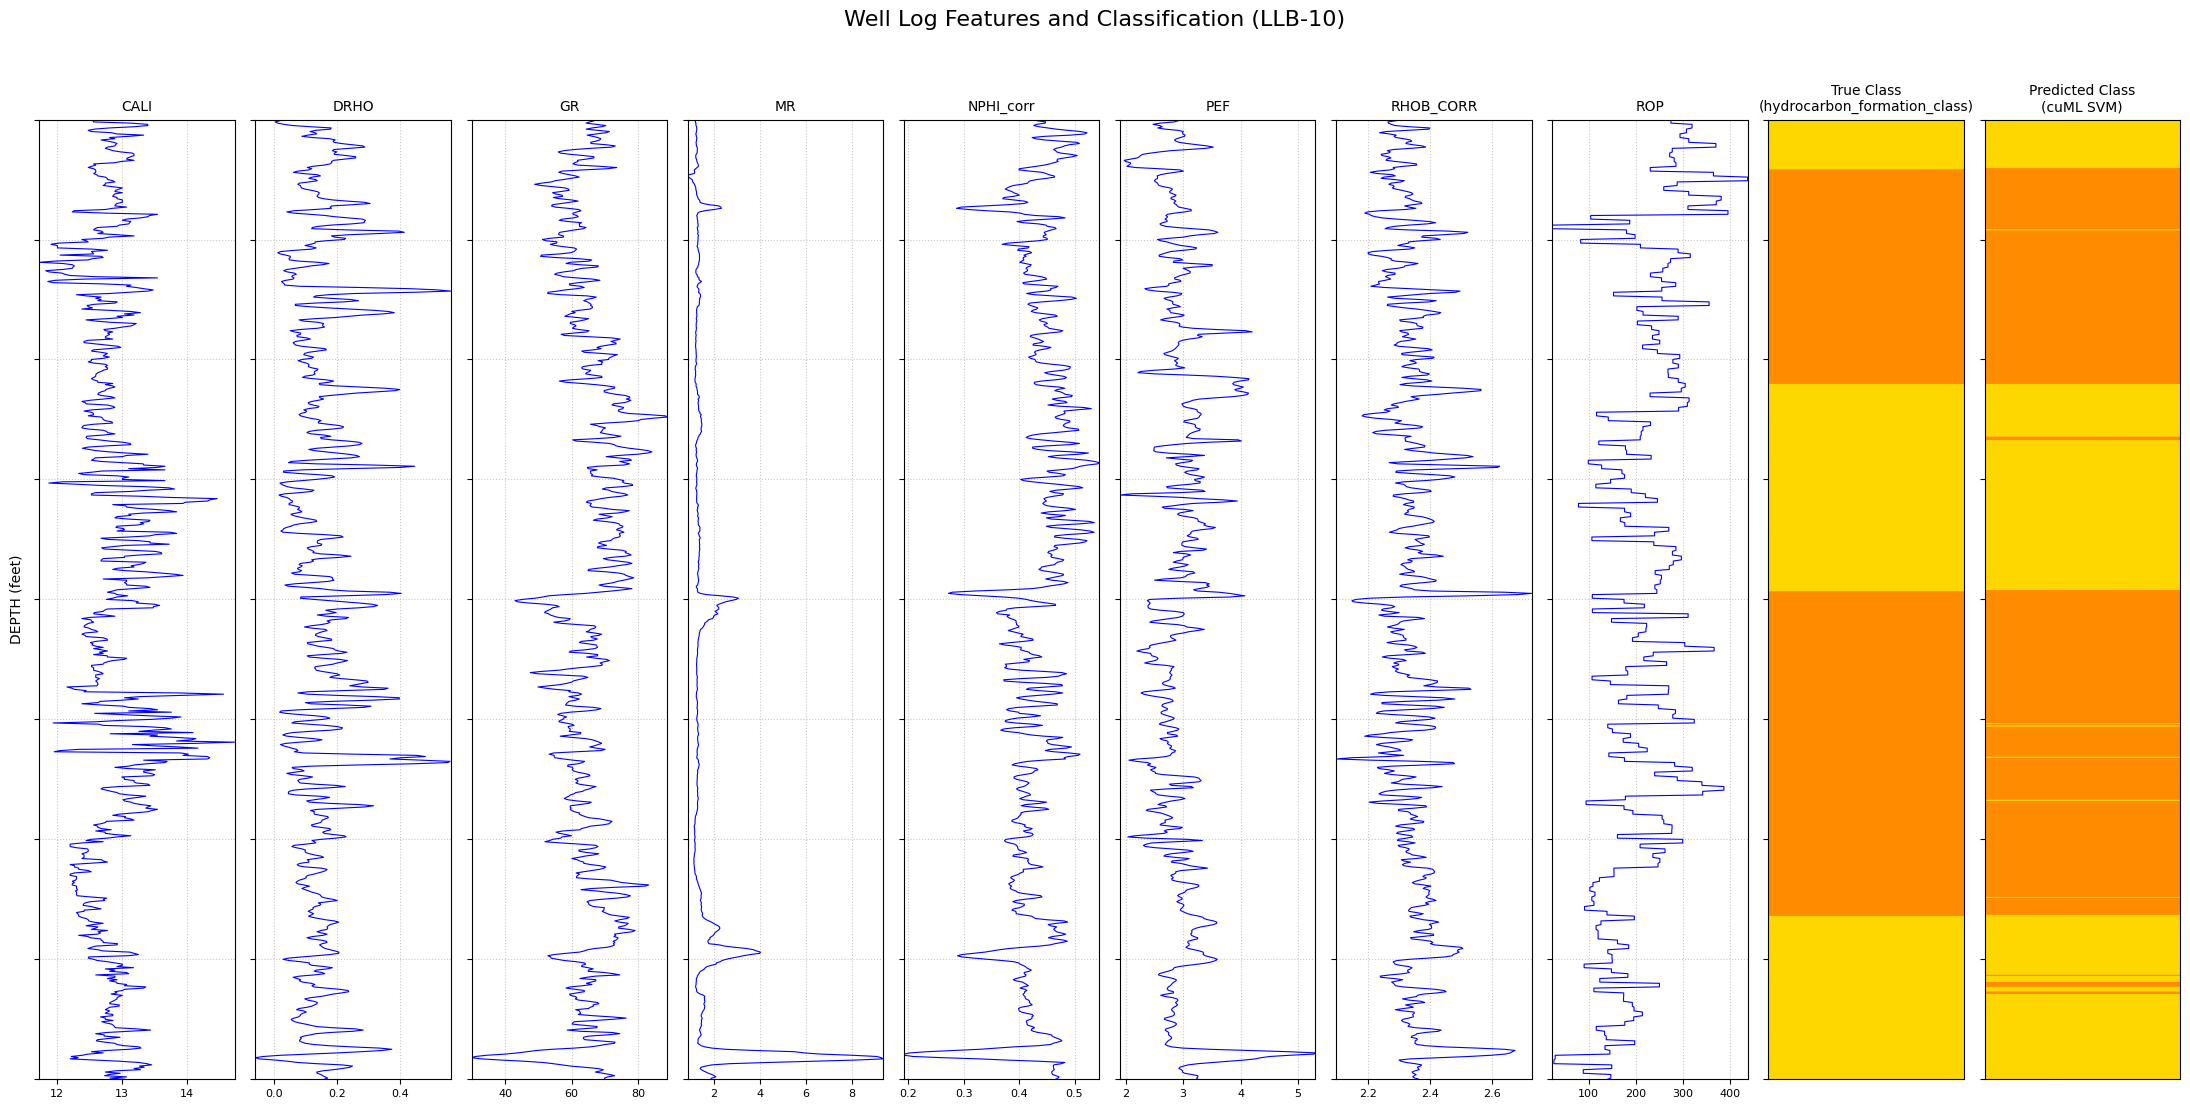

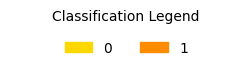

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

# --- Data Preparation for Plotting ---

# Assume 'data' DataFrame is available and contains original features, target, and 'DEPTH'
# Assume 'df' contains the feature column names
# Assume 'best_model' is your trained SVM model from GridSearchCV
# Assume 'model_name' is a string like "cuML SVM" or "Scikit-learn SVM"
# Assume 'X_scaled' is the full dataset features, scaled/transformed appropriately for the best_model

# Get depth values
if 'DEPTH' in data.columns:
    depth_values = data['DEPTH'].values
    # Ensure data is sorted by depth for correct plotting, if not already
    # sort_order = np.argsort(depth_values)
    # depth_values = depth_values[sort_order]
    # feature_data_to_plot = data[df.columns].iloc[sort_order]
    # true_labels_series = data['hydrocarbon_formation_class'].iloc[sort_order]
    # X_scaled_sorted = X_scaled.iloc[sort_order] # X_scaled needs to align for prediction
    feature_data_to_plot = data[df.columns]
    true_labels_series = data['hydrocarbon_formation_class']
    X_scaled_for_pred = X_scaled # Assuming data and X_scaled are already depth-sorted or aligned
else:
    print("Warning: 'DEPTH' column not found in 'data'. Attempting to use data.index for depth.")
    print("Ensure data.index represents actual depth values and is sorted for correct plotting.")
    depth_values = data.index.to_numpy()
    # Add sorting logic here if data.index is used and might not be sorted
    feature_data_to_plot = data[df.columns]
    true_labels_series = data['hydrocarbon_formation_class']
    X_scaled_for_pred = X_scaled


# Get true labels
if isinstance(true_labels_series, pd.Series):
    true_labels_np = true_labels_series.to_numpy()
else:
    true_labels_np = np.asarray(true_labels_series)

# Get predictions for the full dataset
y_pred_full_raw = best_model.predict(X_scaled_for_pred)

# Convert predictions to NumPy array
if hasattr(y_pred_full_raw, 'to_numpy'): # Handles cuDF Series or Pandas Series
    y_pred_full_np = y_pred_full_raw.to_numpy()
elif hasattr(y_pred_full_raw, 'get'):  # Handles CuPy arrays
    y_pred_full_np = y_pred_full_raw.get()
else:
    y_pred_full_np = np.asarray(y_pred_full_raw) # Fallback

# --- Plotting ---
feature_cols_to_plot = df.columns
num_feature_plots = len(feature_cols_to_plot)
n_total_tracks = num_feature_plots + 2  # Features + True Class + Predicted Class

fig, axes = plt.subplots(1, n_total_tracks, figsize=(n_total_tracks * 2.2, 12), sharey=True)
fig.suptitle(f'Well Log Features and Classification ({well_name})', fontsize=16, y=0.95)


# 1. Plot feature logs (using original feature values)
for i, col_name in enumerate(feature_cols_to_plot):
    ax = axes[i]
    ax.plot(feature_data_to_plot[col_name], depth_values, color='blue', linewidth=0.8)
    ax.set_title(col_name, fontsize=10)
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.tick_params(axis='x', labelsize=8)
    # Set x-axis limits based on data range, can be customized
    col_min, col_max = feature_data_to_plot[col_name].min(), feature_data_to_plot[col_name].max()
    ax.set_xlim(col_min, col_max)
    if i == 0:
        ax.set_ylabel('DEPTH (feet)', fontsize=10)
    else:
        ax.tick_params(axis='y', labelsize=8)


# 2. Prepare for classification tracks
# Combine true and predicted labels to find all unique classes for consistent color mapping
all_occurring_classes = np.sort(np.unique(np.concatenate((true_labels_np, y_pred_full_np))))
num_all_classes = len(all_occurring_classes)

# Define colormap (example for 2 classes, similar to reference image)
if num_all_classes == 2:
    # Using 'gold' and 'darkorange' as example colors
    cmap_colors = ListedColormap(['#FFD700', '#FF8C00']) # Gold, DarkOrange
elif num_all_classes == 1: # Edge case
    cmap_colors = ListedColormap(['#FFD700'])
else: # More than 2 classes, use a standard sequential or qualitative map
    cmap_colors = plt.cm.get_cmap('viridis', num_all_classes)

class_to_int_map = {label: idx for idx, label in enumerate(all_occurring_classes)}

true_labels_int = np.array([class_to_int_map.get(label) for label in true_labels_np]).reshape(-1, 1)
y_pred_full_int = np.array([class_to_int_map.get(label) for label in y_pred_full_np]).reshape(-1, 1)

min_depth_val, max_depth_val = depth_values.min(), depth_values.max()

# Plot True Classification Track
ax_true = axes[num_feature_plots]
im_true = ax_true.imshow(true_labels_int, aspect='auto', cmap=cmap_colors,
                         extent=[0, 1, max_depth_val, min_depth_val],
                         vmin=0, vmax=num_all_classes -1 if num_all_classes > 0 else 0)
ax_true.set_title('True Class\n(hydrocarbon_formation_class)', fontsize=10)
ax_true.set_xticks([])

# Plot Predicted Classification Track
ax_pred = axes[num_feature_plots + 1]
im_pred = ax_pred.imshow(y_pred_full_int, aspect='auto', cmap=cmap_colors,
                         extent=[0, 1, max_depth_val, min_depth_val],
                         vmin=0, vmax=num_all_classes -1 if num_all_classes > 0 else 0)
ax_pred.set_title(f'Predicted Class\n({model_name})', fontsize=10)
ax_pred.set_xticks([])

# General Y-axis settings for all plots
for ax_idx, ax in enumerate(axes):
    ax.invert_yaxis()
    ax.set_ylim(max_depth_val, min_depth_val) # Ensure consistent y-limits
    if ax_idx > 0 : # For all but the first plot (which has y-label)
         ax.set_yticklabels([]) # Remove y-tick labels to avoid clutter, keep grid lines if any

plt.tight_layout(rect=[0, 0.03, 1, 0.93]) # Adjust rect to make space for suptitle
plt.show()

# Optional: Add a legend for the classification colors
if num_all_classes > 0:
    plt.figure(figsize=(num_all_classes * 1.5, 0.5))
    legend_ax = plt.gca()
    legend_patches = [plt.Rectangle((0,0),1,1, color=cmap_colors(i/ (num_all_classes if num_all_classes > 1 else 1.0) )) for i in range(num_all_classes)]
    legend_ax.legend(legend_patches, [str(cls) for cls in all_occurring_classes], loc='center', ncol=num_all_classes, frameon=False)
    legend_ax.axis('off')
    plt.title("Classification Legend", fontsize=10)
    plt.show()


In [39]:
from google.colab import runtime
runtime.unassign()